<div style="text-align:center; display:flex; justify-content:center; align-items:center; margin:16px 0px">
    <span style="color:#ff5500; font-family:Play; font-size:3em; margin:auto 32px">Part III<br \>FACEIT Predictor</span>
</div>

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plot-styling-defaults-(Matplotlib-&amp;-Seaborn)" data-toc-modified-id="Plot-styling-defaults-(Matplotlib-&amp;-Seaborn)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot styling defaults (Matplotlib &amp; Seaborn)</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Analyze-and-Describe" data-toc-modified-id="Analyze-and-Describe-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analyze and Describe</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Players-Analysis" data-toc-modified-id="Players-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Players Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#New-Experimental-Features" data-toc-modified-id="New-Experimental-Features-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>New Experimental Features</a></span></li></ul></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Prepare-data-for-training" data-toc-modified-id="Prepare-data-for-training-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Prepare data for training</a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Baseline</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Model-and-Feature-Selection" data-toc-modified-id="Model-and-Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model and Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Neural Networks</a></span></li><li><span><a href="#H2O-Auto-ML" data-toc-modified-id="H2O-Auto-ML-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>H2O Auto ML</a></span></li><li><span><a href="#Traditional-Classifiers" data-toc-modified-id="Traditional-Classifiers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Traditional Classifiers</a></span></li></ul></li><li><span><a href="#Model-Deployment" data-toc-modified-id="Model-Deployment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Deployment</a></span><ul class="toc-item"><li><span><a href="#Save-Model" data-toc-modified-id="Save-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Save Model</a></span></li></ul></li></ul></div>

---

# Introduction

This notebook covers the development of the Machine Learning model to be used in the browser extension FACEIT Predictor. The model predicts the outcome of Counter Strike Global Offensive (a 5v5 First Person Shooter eSport) matches played on the FACEIT platform.

TODO: WRITE THIS SECTION State the purpose of the notebook here and how it is structured

## Imports

In [26]:
# Data manipulation
import pandas as pd
import numpy as np
from glob import glob

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Utils for feature creation
from datetime import datetime
import math
import scipy
from statistics import mean
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.feature_selection import RFE, RFECV

# Outlier Detection
from sklearn.neighbors import LocalOutlierFactor

# Scalers
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Neural network libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Model selection and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# h2o Auto machine learning
#import h2o
#from h2o.automl import H2OAutoML
#from h2o.estimators.xgboost import H2OXGBoostEstimator

# Classifier metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Save the ML model
import joblib

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

#from IPython import get_ipython

#ipython = get_ipython()

# Developed python modules
import load_faceit_data as loader
import add_features

# Import other jupyter notebooks
# import import_ipynb
# import MongoDBAtlas

# autoreload extension
#if "autoreload" not in ipython.extension_manager.loaded:
#    %load_ext autoreload

#%autoreload 2
#%autosave 0
#%load_ext nb_black

## Load Data
Currently, the data is loaded from several pre-processed pkl files.

In [4]:
featurized_data_path = 'data/dataset_featurized/' # use your path
all_files = glob(featurized_data_path + "*.pkl")
chunked_dataframes = [pd.read_pickle(filename) for filename in all_files]
dataset_featurized = pd.concat(chunked_dataframes, ignore_index=True)

In [48]:
dataset_featurized.groupby(by="winner").mean()

,dif_mean_elo,dif_stddev_elo,dif_num_paid_memberships,dif_num_solo_players,dif_num_parties,dif_mean_matches,dif_mean_winrate,dif_mean_kd,dif_mean_multikills_score,dif_mean_rating,dif_mean_matches_on_map,dif_mean_winrate_on_map,dif_mean_kd_on_map,dif_mean_multikills_score_on_map,dif_mean_rating_on_map,dif_mean_matches_map_preference,dif_mean_winrate_map_preference,dif_mean_kd_map_preference,dif_mean_multikills_score_map_preference,dif_mean_rating_map_preference,dif_mean_created_at_faceit,dif_stddev_created_at_faceit,dif_min_created_at_faceit,dif_mean_matches_on_map_prev,dif_mean_winrate_prev,dif_mean_kd_prev,dif_mean_weighted_kd_by_elo_prev,dif_multikills_score_prev,dif_mean_rating_prev,dif_mean_interval_time_prev,dif_mean_interval_time_oldest_prev,dif_mean_interval_time_most_recent_prev,dif_max_interval_time_most_recent_prev,dif_mean_delta_elo_prev,dif_mean_dif_rounds_prev,dif_mean_dif_elo_prev,dif_mean_matches_afk,dif_num_played_togthr_prev,dif_winrate_togthr_prev,dif_mean_first_matches_on_day,dif_mean_matches_on_day,dif_mean_played_map_on_day
winner,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,29.318456,23.805383,0.039522,-0.150899,-0.087993,45.417812,0.005058,0.009570,0.009224,0.008212,18.181951,0.011391,0.015406,0.013169,0.013013,0.007964,0.011956,0.005485,0.006697,0.004644,2.358141e+05,179956.951362,-6.701256e+04,0.114767,0.009424,0.025071,96.269672,0.019313,0.018580,-3734.877840,-5819.397754,-1167.329380,-3343.249747,-0.253219,0.005171,9.856297,0.0,0.011265,0.031144,-0.029244,0.024123,0.021623
1,-28.363697,-19.470382,-0.032528,-0.053795,0.008956,-47.526402,-0.004716,-0.008672,-0.007488,-0.007064,-11.477537,-0.006920,-0.010730,-0.009269,-0.008985,-0.002287,-0.004130,-0.001933,-0.003343,-0.002164,-1.230710e+06,101841.332664,-1.222496e+06,-0.041776,-0.009903,-0.024249,-91.854311,-0.016503,-0.016964,2939.773153,3647.065167,1260.388657,3897.558667,0.276650,-0.000318,-9.801284,0.0,0.004733,-0.029844,0.028094,-0.008880,-0.017521


In [ ]:
featurized_data_path = 'data/featurized/' # use your path
all_files = glob(featurized_data_path + "*.json")

chunked_dataframes = [pd.read_json(filename) for filename in all_files]
dataset = pd.concat(chunked_dataframes, ignore_index=True)

---

# Data Preprocessing

## Analyze and Describe
TODO: Add more functions to pre-analyze the data

In [ ]:
print(dataset.shape)
dataset.head()

In [ ]:
# Change object types (to strings, categorical or numeric)

In [ ]:
dataset.describe(exclude=[np.object])

In [ ]:
# Sample 10% of the whole dataset
dataset = dataset.sample(frac=0.1)

In [ ]:
dataset.shape

## Clean Data

In [ ]:
faceit_maps = [
    "de_train",
    "de_inferno",
    "de_mirage",
    "de_vertigo",
    "de_nuke",
    "de_overpass",
    "de_cache",
    "de_dust2"]
    
date_format = "%Y-%m-%dT%H:%M:%SZ"

In [ ]:
def clean_dataframe(data):
    print("Dataframe's shape before cleaning", data.shape)

    data.drop(
        columns=["_id", "_id__stitch_transaction", "state", "match_status"],
        inplace=True)
        
    data = data[data["score"].notnull()]
    data = data[data["mapPlayed"].isin(faceit_maps)]

    # Removal of duplicate matches
    data.drop_duplicates(subset=["match_id"], keep="first", inplace=True)

    # Removal of non 5v5 matches
    data.loc[:, "num_players"] = data.apply(
        lambda row: get_num_players(row), axis=1
    ).values
    data = data[data["num_players"] == 10]

    print("Dataframe's shape after cleaning", data.shape)
    return data


def get_num_players(row):
    return len(row["teamA"]) + len(row["teamB"])

In [ ]:
dataset = clean_dataframe(dataset)

## Players Analysis

In [ ]:
def get_all_players_elos(data):
    all_players = []
    for _, row in data.iterrows():
        for player_id, player_info in row["teamA"].items():
            all_players.append(player_info["elo"])
        for player_id, player_info in row["teamB"].items():
            all_players.append(player_info["elo"])
    return all_players


def get_player_elo_kde(data):
    player_elos = get_all_players_elos(data)
    player_elos = np.array(player_elos)
    player_elos_series = pd.Series(player_elos)
    kde = player_elos_series.plot.kde(ind=1000)
    xdata, ydata = kde.get_lines()[0].get_data()
    return scipy.integrate.cumtrapz(ydata, xdata, dx=1, initial=0), xdata


def get_elo_dif_prob(lower_bound, upper_bound, cdf, bins):
    lower_bin = (np.abs(bins - lower_bound)).argmin()
    upper_bin = (np.abs(bins - upper_bound)).argmin()
    return cdf[upper_bin] - cdf[lower_bin]


players_elo_distribution, elo_bins = get_player_elo_kde(dataset)

In [ ]:
def get_all_players_info(data):
    players_id = []
    elos = []
    matches = []
    winrates = []
    kds = []
    hs_percents = []
    # add createdAt (accounts created a long time ago with few matches might be smurfs)
    for _, row in data.iterrows():
        for player_id, player_info in row["teamA"].items():
            if player_info["lifetimeData"] == None:
                players_id.append(0)
                elos.append(0)
                matches.append(0)
                winrates.append(0)
                kds.append(0)
                hs_percents.append(0)
                continue
            players_id.append(player_info["id"])
            elos.append(player_info["elo"])
            matches.append(int(player_info["lifetimeData"]["matches"]))
            winrates.append(int(player_info["lifetimeData"]["winRate"]))
            kds.append(float(player_info["lifetimeData"]["averageKD"]))
            hs_percents.append(int(player_info["lifetimeData"]["averageHS"]))

        for player_id, player_info in row["teamB"].items():
            if player_info["lifetimeData"] == None:
                players_id.append(0)
                elos.append(0)
                matches.append(0)
                winrates.append(0)
                kds.append(0)
                hs_percents.append(0)
                continue
            players_id.append(player_info["id"])
            elos.append(player_info["elo"])
            matches.append(int(player_info["lifetimeData"]["matches"]))
            winrates.append(int(player_info["lifetimeData"]["winRate"]))
            kds.append(float(player_info["lifetimeData"]["averageKD"]))
            hs_percents.append(int(player_info["lifetimeData"]["averageHS"]))

    return (
        np.array(players_id),
        np.array(elos),
        np.array(matches),
        np.array(winrates),
        np.array(kds),
        np.array(hs_percents),
    )

In [ ]:
players_id, elos, matches, winrates, kds, hs_percents = get_all_players_info(dataset)
array = [[elos[i], matches[i], winrates[i], kds[i]] for i in range(len(elos))]
X = np.array(array)

In [ ]:
mean_winrate = mean(winrates)
mean_kd = mean(kds)

In [ ]:
lof = LocalOutlierFactor(contamination=0.05)
lof.fit(X)

In [ ]:
def smurf_or_cheater_prob(outlier_model):
    # Check if user is verified (then, it is probably a pro)
    transformed_outlier_factor = []
    for i in range(len(outlier_model.negative_outlier_factor_)):
        if (
            (outlier_model.negative_outlier_factor_[i] < -1)
            and (winrates[i] > mean_winrate)
            and (kds[i] > mean_kd)
        ):
            transformed_outlier_factor.append(
                math.log(-outlier_model.negative_outlier_factor_[i]) * 100
            )
        else:
            transformed_outlier_factor.append(0)
        arr = np.array(transformed_outlier_factor)

    team_A = arr.reshape(-1, 5)[::2, :]
    team_B = arr.reshape(-1, 5)[1::2, :]

    dataset["smurf_or_cheater_A"] = np.mean(team_A, axis=1)
    dataset["smurf_or_cheater_B"] = np.mean(team_B, axis=1)
    dataset["dif_smurf_or_cheater"] = (
        dataset["smurf_or_cheater_A"] - dataset["smurf_or_cheater_B"]
    )

In [ ]:
smurf_or_cheater_prob(lof)

## Feature Engineering

In [ ]:
dataset.loc[:, "unix_start_time"] = (
    pd.to_datetime(dataset["startTime"], format=date_format)
    .values.astype("datetime64[s]")
    .astype("int")
)
dataset.drop(columns=["startTime"], inplace=True)

In [ ]:
add_features.add_all_team_features(dataset)

In [ ]:
dataset.loc[:, "missing_info"] = dataset.apply(
    lambda row: add_features.get_missing_info(row), axis=1
).values

In [ ]:
def dif_elo_prob(row):
    return get_elo_dif_prob(
        row["mean_elo_A"], row["mean_elo_B"], players_elo_distribution, elo_bins
    )


dataset.loc[:, "dif_elo_prob"] = dataset.apply(
    lambda row: dif_elo_prob(row), axis=1
).values

In [ ]:
def convert_winner_to_numeric(row):
    winner_numeric = 0 if row["score"] == "faction1" else 1
    return winner_numeric


dataset.loc[:, "winner"] = dataset.apply(
    lambda row: convert_winner_to_numeric(row), axis=1
).values

### New Experimental Features
Creation and test of new features. Once validated the correspondent function should be moved to `add_features.py`.

## Prepare data for training

In [ ]:
selected_cols = [
    "_id",
    "winner",
    "dif_mean_elo",
    "dif_stddev_elo",
    "dif_num_paid_memberships",
    "dif_num_solo_players",
    "dif_num_parties",
    "dif_num_new_players",
    "dif_mean_matches",
    "dif_mean_matches_on_map",
    "dif_mean_winrate_on_map",
    "dif_mean_kd_on_map",
    "dif_mean_matches_map_preference",
    "dif_mean_winrate_map_preference",
    "dif_mean_kd_map_preference",
    "dif_mean_matches_on_map_prev",
    "dif_mean_winrate_prev",
    "dif_multikills_score_prev",
    "dif_mean_assists_prev",
    "dif_mean_kd_prev",
    "dif_mean_rating_prev",
    "dif_mean_delta_rating_prev",
    "dif_mean_interval_time_prev",
    "dif_max_interval_time_prev",
    "dif_mean_delta_elo_prev",
    "dif_num_played_togthr_prev",
    "dif_mean_first_matches_on_day",
    "dif_mean_matches_on_day",
    "dif_mean_played_map_on_day",
    "dif_mean_created_at_faceit",
    "dif_stddev_created_at_faceit",
    "dif_min_created_at_faceit",
]

data_processed = dataset[selected_cols]
data_label = data_processed["winner"]
data_features = data_processed.drop(columns=["winner", "_id"])

In [ ]:
dataset.columns

In [ ]:
def get_inverse_score(winners):
    inverted_winners = [1 if winner == 0 else 0 for winner in winners]
    return inverted_winners


dataset["winner"] = get_inverse_score(dataset["winner"].values)

In [ ]:
selected_cols = [
    "dif_new_players",
    "dif_mean_matches",
    "dif_mean_matches_on_map",
    "dif_mean_winrate_on_map",
    "dif_mean_kd_on_map",
    "dif_mean_matches_preference",
    "dif_mean_winrate_preference",
    "dif_mean_kd_preference",
    "dif_mean_elo",
    "dif_stddev_elo",
    "dif_paid_memberships",
    "dif_solo_players",
    "dif_num_parties",
    "dif_mean_matches_on_map_prev",
    "dif_mean_winrate_prev",
    "dif_multikills_prev",
    "dif_mean_assists_prev",
    "dif_mean_kd_prev",
    "dif_mean_time_prev",
    "dif_delta_mean_elo_prev",
    "dif_smurf_or_cheater",
    "dif_max_time_prev",
    "dif_elo_prob",
    "dif_first_match",
    "dif_mean_time_created_at",
    "dif_stddev_time_created_at",
    "dif_min_time_created_at",
    "dif_mean_matches_today",
    "dif_played_map_today",
    "dif_have_played_together_prev",
    "winner",
]

data_processed = dataset[selected_cols]
data_label = data_processed["winner"]
data_features = data_processed.drop(columns=["winner"])

In [ ]:
data_processed.to_csv("big_data_processed.csv")

---

# Baseline
Show graphs and stats here

In [ ]:
selected_cols = [
    "_id",
    "winner",
    "dif_mean_elo",
    "dif_stddev_elo",
    "dif_num_paid_memberships",
    "dif_num_solo_players",
    "dif_num_parties",
    "dif_mean_matches",
    "dif_mean_winrate",
    "dif_mean_kd",
    "dif_mean_multikills_score",
    "dif_mean_rating",
    "dif_mean_matches_on_map",
    "dif_mean_winrate_on_map",
    "dif_mean_kd_on_map",
    "dif_mean_multikills_on_map",
    "dif_mean_rating_on_map",
    "dif_mean_matches_map_preference",
    "dif_mean_winrate_map_preference",
    "dif_mean_kd_map_preference",
    "dif_mean_multikills_map_preference",
    "dif_mean_rating_map_preference",
    "dif_mean_matches_on_map_prev",
    "dif_mean_winrate_prev",
    "dif_mean_kd_prev",
    "dif_mean_weighted_kd_by_elo_prev",
    "dif_multikills_score_prev",
    "dif_mean_rating_prev",
    "dif_mean_delta_rounds_predictor_prev",
    "dif_mean_interval_time_prev",
    "dif_max_interval_time_prev",
    "dif_mean_interval_time_most_recent_prev",
    "dif_max_interval_time_most_recent_prev",
    "dif_mean_delta_elo_prev",
    "dif_mean_dif_rounds_prev",
    "dif_mean_dif_elo_prev",
    "dif_num_matches_afk",
    "dif_num_played_togthr_prev",
    "dif_mean_first_matches_on_day",
    "dif_mean_matches_on_day",
    "dif_mean_played_map_on_day",
    "dif_mean_created_at_faceit",
    "dif_stddev_created_at_faceit",
    "dif_min_created_at_faceit",
]
data_processed = dataset[selected_cols]
data_label = data_processed["winner"]
data_features = data_processed.drop(columns=["winner", "_id"])

## Model

In [32]:
data_label = dataset_featurized["winner"]
data_features = dataset_featurized.drop(columns=["winner", "_id"])

In [33]:
scaler = StandardScaler()
data_features = pd.DataFrame(scaler.fit_transform(data_features), columns=data_features.columns)

In [ ]:
data_processed_winner_0 = data_processed[data_processed["winner"] == 0]
data_processed_winner_1 = data_processed[data_processed["winner"] == 1]

In [ ]:
data_processed_winner_0["dif_mean_elo"].mean()

In [ ]:
data_processed_winner_1["dif_mean_elo"].mean()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_label, test_size=0.3, random_state=42
)

In [8]:
X_test.shape

(20676, 42)

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print_metrics(xgb, X_train, y_train, X_test, y_test)

In [ ]:
estimator = XGBClassifier(objective="binary:logistic", seed=42)

In [ ]:
parameters = {
#     "max_depth": range(2, 10, 1),
    "n_estimators": range(60, 220, 40),
    "learning_rate": [0.1, 0.01],
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
    verbose=True,
)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf_xgb = XGBClassifier(objective="binary:logistic")
param_dist = {
    "n_estimators": stats.randint(150, 1000),
    "learning_rate": stats.uniform(0.01, 0.6),
    "subsample": stats.uniform(0.3, 0.9),
    "max_depth": [3, 4, 5, 6, 7, 8, 9],
    "colsample_bytree": stats.uniform(0.5, 0.9),
    "min_child_weight": [1, 2, 3, 4],
}
clf = RandomizedSearchCV(
    clf_xgb,
    param_distributions=param_dist,
    n_iter=5,
    scoring="roc_auc",
    error_score=0,
    verbose=3,
    n_jobs=-1,
)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
# Baseline model: Random Forest with default parameters
rf = RandomForestClassifier()

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print_metrics(lda, X_train, y_train, X_test, y_test)

In [ ]:
# Alternative Baseline Model with slightly better performance
# rf = RandomForestClassifier(
#     n_estimators=1500,
#     max_features=0.3,
#     max_depth=7,
#     min_samples_leaf=0.005,
#     random_state=41,
# )

In [36]:
rf = RandomForestClassifier(
    n_estimators=100, min_samples_leaf=0.01, min_samples_split=0.01
)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.01, min_samples_split=0.01)

## Evaluation

In [38]:
def print_metrics(model, X_train, y_train, X_test, y_test):
    print("Model Score (Mean accuracy on test data)", model.score(X_test, y_test))
    pred = model.predict(X_test)
    print("\nClassification Report")
    print(classification_report(y_test, pred))
    roc_graph = plot_roc_curve(model, X_test, y_test)
    print("AUC:", roc_graph.roc_auc)

In [39]:
rf.score(X_train, y_train)

0.617006280964325

In [40]:
feature_importances_df = pd.DataFrame({"features":X_train.columns, "importances":rf.feature_importances_})
feature_importances_df.sort_values(by="importances", ascending=False).head(20)

,features,importances
0,dif_mean_elo,0.193113
26,dif_mean_weighted_kd_by_elo_prev,0.168658
11,dif_mean_winrate_on_map,0.071031
28,dif_mean_rating_prev,0.070362
25,dif_mean_kd_prev,0.065588
12,dif_mean_kd_on_map,0.064005
14,dif_mean_rating_on_map,0.057669
10,dif_mean_matches_on_map,0.041879
6,dif_mean_winrate,0.030742
15,dif_mean_matches_map_preference,0.024923


Model Score (Mean accuracy on test data) 0.6077094215515574

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.63      0.62     10338
           1       0.61      0.59      0.60     10338

    accuracy                           0.61     20676
   macro avg       0.61      0.61      0.61     20676
weighted avg       0.61      0.61      0.61     20676



C:\Users\hmbf1\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


AUC: 0.6551446202510681


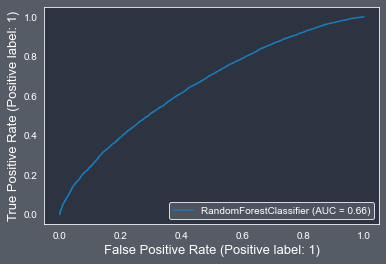

In [41]:
print_metrics(rf, X_train, y_train, X_test, y_test)

In [14]:
# Displays the correlation matrix regarding the features present in dataset
corr_mat = data_processed.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(corr_mat, annot=True, cbar=False, annot_kws={"size": 10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

NameError: name 'data_processed' is not defined

In [ ]:
permutation_info = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1
)

features_info = list(
    zip(
        X_train.columns,
        permutation_info["importances_mean"],
        permutation_info["importances_std"],
    )
)

# Sort by descending mean feature importance
features_info = sorted(features_info, key=lambda feature: feature[1], reverse=True)

features_imp_df = pd.DataFrame(
    features_info, columns=["feature_name", "mean_importance", "stddev_importance"]
)

features_imp_df.head(40)

---

# Model and Feature Selection

In [ ]:
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data_label, test_size=0.3, random_state=42
)

## Neural Networks

TODO:

* Change to Tensorflow 2 framework
* Build a process to test and optimize Neural Networks
     

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
# Initializing Neural Network
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=64, activation="relu", input_dim=42))
# Adding the second hidden layer
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=128, activation="relu"))
# Adding the second hidden layer
classifier.add(Dropout(0.5))
classifier.add(Dense(units=64, activation="relu"))
# Adding the output layer
classifier.add(Dense(units=1, activation="sigmoid"))

In [59]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [60]:
classifier.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6772 - accuracy: 0.5731
Epoch 2/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6618 - accuracy: 0.6004
Epoch 3/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6573 - accuracy: 0.6078
Epoch 4/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6552 - accuracy: 0.6102
Epoch 5/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6532 - accuracy: 0.6132
Epoch 6/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6525 - accuracy: 0.6137
Epoch 7/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6518 - accuracy: 0.6142
Epoch 8/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6511 - accuracy: 0.6143
Epoch 9/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6507 - accuracy: 0.6153
Epoch 10/20
754/754 [==============================] - 2s 2ms/step - loss: 0.6504 - accuracy: 0.6175

In [61]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5
print(classification_report(y_test, y_pred))
print("Test accuracy", accuracy_score(y_test, y_pred))
auc_score = roc_auc_score(y_test, classifier.predict(X_test).ravel())
print("AUC Score", auc_score)

              precision    recall  f1-score   support

           0       0.61      0.66      0.63     10338
           1       0.63      0.57      0.60     10338

    accuracy                           0.62     20676
   macro avg       0.62      0.62      0.61     20676
weighted avg       0.62      0.62      0.61     20676

Test accuracy 0.6154478622557554
AUC Score 0.665581798173936


## H2O Auto ML

This section should be executed in a Linux environment, because H2O's XGBoost is not available on Windows.

In [ ]:
h2o.init(max_mem_size="8G")

In [ ]:
hf = h2o.H2OFrame(data_processed)

In [ ]:
splits = hf.split_frame(ratios=[0.7], seed=1)
train = splits[0]
test = splits[1]

In [ ]:
# Identify predictors and response
x = train.columns
y = "winner"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()

In [ ]:
aml = H2OAutoML(max_runtime_secs=600, seed=1, max_models=50)
aml.train(x=x, y=y, training_frame=train)

In [ ]:
lb = aml.leaderboard
lb.head()

In [ ]:
pred = aml.predict(test)
pred.head()

In [ ]:
perf = aml.leader.model_performance(test)
print(perf)

## Traditional Classifiers

In [ ]:
classifiers = {}
classifiers.update({"LDA": LinearDiscriminantAnalysis()})
classifiers.update({"AdaBoost": AdaBoostClassifier()})
classifiers.update({"Bagging": BaggingClassifier()})
classifiers.update({"Extra Trees Ensemble": ExtraTreesClassifier()})
classifiers.update({"Gradient Boosting": GradientBoostingClassifier()})
classifiers.update({"Random Forest": RandomForestClassifier()})
classifiers.update({"Ridge": RidgeClassifier()})
classifiers.update({"BNB": BernoulliNB()})
classifiers.update({"MLP": MLPClassifier()})
classifiers.update({"LSVC": LinearSVC()})
classifiers.update({"NuSVC": NuSVC()})
classifiers.update({"SVC": SVC()})
classifiers.update({"DTC": DecisionTreeClassifier()})
classifiers.update({"ETC": ExtraTreeClassifier()})
classifiers.update({"XGB": XGBClassifier()})


# Create dict of decision function labels
DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "NuSVC", "SVC"}

# Create dict for classifiers with feature_importances_ attribute
FEATURE_IMPORTANCE = {
    "Gradient Boosting",
    "Extra Trees Ensemble",
    "Random Forest",
    "XGB",
}

In [ ]:
# Fit all the classifiers with default parameters and create dataframe with score
classifiers_dataframe = pd.DataFrame(columns=["Model", "Score"])

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    classifiers_dataframe = classifiers_dataframe.append(
        {"Model": name,
         "Score": score,
         "AUC": plot_roc_curve(clf, X_test, y_test).roc_auc},
        ignore_index=True
    )

In [ ]:
classifiers_dataframe.sort_values(by="Score", ascending=False)

In [ ]:
# Hyperparameter configuration

# Initiate parameter grid
parameters = {}

# Update dict with LDA
parameters.update({"LDA": {"solver": ["svd"],}})

# Update dict with AdaBoost
parameters.update(
    {
        "AdaBoost": {
            "base_estimator": [
                DecisionTreeClassifier(max_depth=ii) for ii in range(1, 6)
            ],
            "n_estimators": [200],
            "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0],
        }
    }
)

# Update dict with Bagging
parameters.update(
    {
        "Bagging": {
            "base_estimator": [
                DecisionTreeClassifier(max_depth=ii) for ii in range(1, 6)
            ],
            "n_estimators": [200],
            "max_features": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
            "n_jobs": [-1],
        }
    }
)

# Update dict with Gradient Boosting
parameters.update(
    {
        "Gradient Boosting": {
            "learning_rate": [0.05, 0.01, 0.001],
            "n_estimators": [200],
            "max_depth": [4, 5],
            "min_samples_split": [0.01],
            "min_samples_leaf": [0.01],
            "max_features": ["auto"],
            "subsample": [0.8, 1],
        }
    }
)


# Update dict with Extra Trees
parameters.update(
    {
        "Extra Trees Ensemble": {
            "n_estimators": [200],
            "class_weight": [None, "balanced"],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [3, 4, 5, 6, 7, 8],
            "min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
            "criterion": ["gini", "entropy"],
            "n_jobs": [-1],
        }
    }
)


# Update dict with Random Forest Parameters
parameters.update(
    {
        "Random Forest": {
            "n_estimators": [400],
            "class_weight": ["balanced"],
            "max_features": ["auto", "sqrt"],
            "max_depth": [10, 11, 12],
            "min_samples_split": [0.001],
            "min_samples_leaf": [0.001],
            "criterion": ["gini", "entropy"],
            "n_jobs": [-1],
        }
    }
)


# Update dict with Ridge
parameters.update(
    {
        "Ridge": {
            "alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
        }
    }
)

# Update dict with BernoulliNB Classifier
parameters.update(
    {
        "BNB": {
            "alpha": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.50, 0.75, 1.0]
        }
    }
)


# Update dict with MLPClassifier
parameters.update(
    {
        "MLP": {
            "hidden_layer_sizes": [
                (5),
                (10),
                (5, 5),
                (10, 10),
                (5, 5, 5),
                (10, 10, 10),
            ],
            "activation": ["identity", "logistic", "tanh", "relu"],
            "learning_rate": ["constant", "invscaling", "adaptive"],
            "max_iter": [100, 200, 300, 500, 1000, 2000],
            "alpha": list(10.0 ** -np.arange(1, 10)),
        }
    }
)

parameters.update(
    {"LSVC": {"penalty": ["l2"], "C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]}}
)

parameters.update(
    {
        "NuSVC": {
            "nu": [0.25, 0.50, 0.75],
            "kernel": ["linear", "rbf", "poly"],
            "degree": [1, 2, 3, 4, 5, 6],
        }
    }
)

parameters.update(
    {
        "SVC": {
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["auto"],
            "C": [0.1, 0.5, 1, 5, 10, 50, 100],
            "degree": [1, 2, 3, 4, 5, 6],
        }
    }
)


# Update dict with Decision Tree Classifier
parameters.update(
    {
        "DTC": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "class_weight": [None, "balanced"],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
            "min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
        }
    }
)

# Update dict with Extra Tree Classifier
parameters.update(
    {
        "ETC": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "class_weight": [None, "balanced"],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
            "min_samples_split": [0.005, 0.01, 0.05, 0.10],
            "min_samples_leaf": [0.005, 0.01, 0.05, 0.10],
        }
    }
)

# Update dict with XGBoost Classifier
# Inspired in https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
parameters.update(
    {
        "XGB": {
            "learning_rate": [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
            "n_estimators": [200],
            "max_depth": [2, 3, 4, 5, 6],
            "min_child_weight": [1, 3, 5, 7],
            "gama": [0, 0.1, 0.2, 0.3, 0.4],
            "ccolsample_bytree": [0.6, 0.7, 0.8, 0.9],
            "subsample": [0.6, 0.7, 0.8, 0.9],
            "reg_alpha": [1e-5, 1e-2, 0.1, 1, 100],
        }
    }
)

In [ ]:
classifiers_dataframe = pd.DataFrame(columns=["Model", "Best_Params", "Best_Score"])

In [ ]:
# Fit all the classifiers with hyperparameterss optimized
for name, clf in classifiers.items():
    if name in classifiers_dataframe["Model"].values:
        continue
    param_grid = parameters[name]
    print(param_grid)
    gscv = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
    print(f"Now tuning {name}.")
    gscv.fit(X_train, y_train)

    # Get best parameters and score
    best_params = gscv.best_params_
    best_score = gscv.best_score_

    classifiers_dataframe = classifiers_dataframe.append(
        {"Model": name, "Best_Params": best_params, "Best_Score": best_score},
        ignore_index=True,
    )

In [ ]:
classifiers_dataframe

In [ ]:
# Define classifier to use as the base of the recursive feature elimination algorithm
selected_classifier = "Random Forest"
classifier = classifiers[selected_classifier]

# Tune classifier (Took = 4.8 minutes)

# Scale features via Z-score normalization
scaler = StandardScaler()

# Define steps in pipeline
steps = [("scaler", scaler), ("classifier", classifier)]

# Initialize Pipeline object
pipeline = Pipeline(steps=steps)

# Define parameter grid
param_grid = parameters[selected_classifier]

# Initialize GridSearch object
gscv = GridSearchCV(
    classifier, param_grid, cv=5, n_jobs=-1, verbose=1, scoring="roc_auc"
)

# Fit gscv
print(f"Now tuning {selected_classifier}. Go grab a beer or something.")
gscv.fit(X_train, np.ravel(y_train))

# Get best parameters and score
best_params = gscv.best_params_
best_score = gscv.best_score_

# Update classifier parameters
# tuned_params = {item[12:]: best_params[item] for item in best_params}
classifier.set_params(**best_params)

In [ ]:
best_params

In [ ]:
# Select Features using RFECV
class PipelineRFE(Pipeline):
    # Source: https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [ ]:
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps=steps)

# Initialize RFECV object
feature_selector = RFECV(pipe, cv=5, step=1, scoring="roc_auc", verbose=1)

# Fit RFECV
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

In [ ]:
# Get Performance Data
performance_curve = {
    "Number of Features": list(range(1, len(feature_names) + 1)),
    "AUC": feature_selector.grid_scores_,
}
performance_curve = pd.DataFrame(performance_curve)

# Performance vs Number of Features
# Set graph style
sns.set(font_scale=1.75)
sns.set_style(
    {
        "axes.facecolor": "1.0",
        "axes.edgecolor": "0.85",
        "grid.color": "0.85",
        "grid.linestyle": "-",
        "axes.labelcolor": "0.4",
        "xtick.color": "0.4",
        "ytick.color": "0.4",
    }
)
colors = sns.color_palette("RdYlGn", 20)
line_color = colors[3]
marker_colors = colors[-1]

# Plot
f, ax = plt.subplots(figsize=(13, 6.5))
sns.lineplot(
    x="Number of Features",
    y="AUC",
    data=performance_curve,
    color=line_color,
    lw=4,
    ax=ax,
)
sns.regplot(
    x=performance_curve["Number of Features"],
    y=performance_curve["AUC"],
    color=marker_colors,
    fit_reg=False,
    scatter_kws={"s": 200},
    ax=ax,
)

# Axes limits
plt.xlim(0.5, len(feature_names) + 0.5)
plt.ylim(0.60, 0.925)

# Generate a bolded horizontal line at y = 0
ax.axhline(y=0.625, color="black", linewidth=1.3, alpha=0.7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

In [ ]:
# View the performance of the algorithm vs the number of features
performance_curve.head(40)

In [ ]:
# Select the optimal number of features
num_features = 18

In [ ]:
# Define pipeline for RFECV
steps = [("scaler", scaler), ("classifier", classifier)]
pipe = PipelineRFE(steps = steps)

# Initialize RFE object
feature_selector = RFE(pipe, n_features_to_select = num_features, step = 1, verbose = 1)

# Fit RFE
feature_selector.fit(X_train, np.ravel(y_train))

# Get selected features labels
feature_names = X_train.columns
selected_features = feature_names[feature_selector.support_].tolist()

In [ ]:
# Get selected features data set
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Train classifier
classifier.fit(X_train, np.ravel(y_train))

# Get feature importance
feature_importance = pd.DataFrame(selected_features, columns = ["Feature Label"])
feature_importance["Feature Importance"] = classifier.feature_importances_

# Sort by feature importance
feature_importance = feature_importance.sort_values(by="Feature Importance", ascending=False)

# Set graph style
sns.set(font_scale = 1.75)
sns.set_style({"axes.facecolor": "1.0", "axes.edgecolor": "0.85", "grid.color": "0.85",
               "grid.linestyle": "-", 'axes.labelcolor': '0.4', "xtick.color": "0.4",
               'ytick.color': '0.4'})

# Set figure size and create barplot
f, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = "Feature Importance", y = "Feature Label",
            palette = reversed(sns.color_palette('YlOrRd', 15)),  data = feature_importance)

# Generate a bolded horizontal line at y = 0
ax.axvline(x = 0, color = 'black', linewidth = 4, alpha = .7)

# Turn frame off
ax.set_frame_on(False)

# Tight layout
plt.tight_layout()

---

# Model Deployment

## Save Model

In [ ]:
# Deploy LDA
# Score on test data : 63.7
# AUC on test data: 69.5
date = datetime.now().__str__()
date = date.replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
model_name = "_".join(["model", "lda", date])
joblib.dump(lda, model_name + ".pkl")

In [ ]:
date = datetime.now().__str__()
date = date.replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
model_name = "_".join(["model", "xgb", date])
joblib.dump(xgb, model_name + ".pkl")

In [ ]:
date = datetime.now().__str__()
date = date.replace(" ", "_").replace(":", "_").replace("-", "_").replace(".", "_")
model_name = "_".join(["model", "rf", date])
joblib.dump(rf, model_name + ".pkl")

In [ ]:
# TODO: model version control and auto-deployment
# Save the model as a pickle in a file 
joblib.dump(model, 'model.pkl') 

In [ ]:
match_predictor = joblib.load('./model_rf_2020_03_15_20_21_52_916182.pkl')

In [ ]:
selected_cols = [
    "winner",
    "dif_mean_elo",
    "dif_stddev_elo",
    "dif_num_paid_memberships",
    "dif_num_solo_players",
    "dif_num_parties",
    "dif_num_new_players",
    "dif_mean_matches",
    "dif_mean_matches_on_map",
    "dif_mean_winrate_on_map",
    "dif_mean_kd_on_map",
    "dif_mean_matches_map_preference",
    "dif_mean_winrate_map_preference",
    "dif_mean_kd_map_preference",
    "dif_mean_matches_on_map_prev",
    "dif_mean_winrate_prev",
    "dif_multikills_score_prev",
    "dif_mean_assists_prev",
    "dif_mean_kd_prev",
    "dif_mean_rating_prev",
    "dif_mean_delta_rating_prev",
    "dif_mean_interval_time_prev",
    "dif_max_interval_time_prev",
    "dif_mean_delta_elo_prev",
    "dif_num_played_togthr_prev",
    "dif_mean_first_matches_on_day",
    "dif_mean_matches_on_day",
    "dif_mean_played_map_on_day",
    "dif_mean_created_at_faceit",
    "dif_stddev_created_at_faceit",
    "dif_min_created_at_faceit",
]

data_processed_new = data_new[selected_cols]
data_label_new = data_processed_new["winner"]
data_features_new = data_processed_new.drop(columns=["winner", "_id"])

In [ ]:
y_pred = classifier.predict(data_features_new)
y_pred = y_pred > 0.5
print(classification_report(data_label_new, y_pred))
print("Test accuracy", accuracy_score(data_label_new, y_pred))
auc_score = roc_auc_score(data_label_new, classifier.predict(X_test).ravel())
print("AUC Score", auc_score)